In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

In [2]:
train = pd.read_csv('./data/total_rent.csv')
train.head(5)

,Unnamed: 0,STATION,기온,강수량,풍속,습도,적설,year,month,day,hour,season,weekday,RENTCOUNT
0,0,1,-8.8,0.0,0.1,90.0,8.8,2013,1,1,0,3,1,0.0
1,1,1,-8.5,0.0,0.9,90.0,8.8,2013,1,1,1,3,1,0.0
2,2,1,-8.5,0.0,1.0,89.0,8.8,2013,1,1,2,3,1,0.0
3,3,1,-9.0,0.0,0.7,91.0,8.8,2013,1,1,3,3,1,0.0
4,4,1,-9.1,0.0,0.6,92.0,8.8,2013,1,1,4,3,1,0.0


In [3]:
station_df = pd.read_csv('./data/station.csv')
station_df.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


In [4]:
train.groupby(['STATION'])['RENTCOUNT'].sum().nlargest(10)

STATION
3      174558.0
56      91027.0
31      83488.0
17      82868.0
32      73573.0
33      71107.0
14      57448.0
21      56295.0
105     56242.0
55      55134.0
Name: RENTCOUNT, dtype: float64

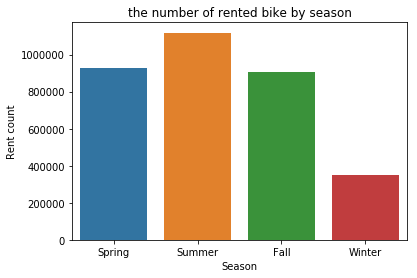

In [5]:
group_season = train.groupby(['season'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['season'], y=group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('the number of rented bike by season')
plt.show()

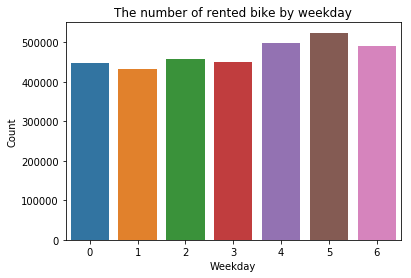

In [6]:
group_weekday = train.groupby(['weekday'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['weekday'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.title('The number of rented bike by weekday')
plt.show()

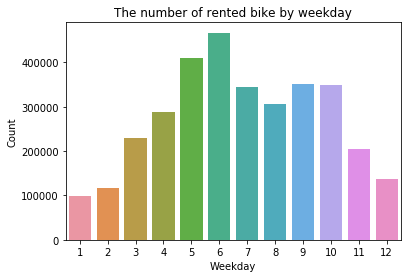

In [7]:
group_mn = train.groupby(['month'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['month'], y=group_mn['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
weekday = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.title('The number of rented bike by weekday')
plt.show()

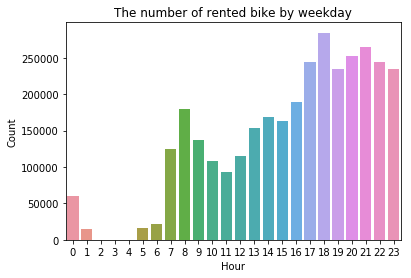

In [8]:
group_hr = train.groupby(['hour'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['hour'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by weekday')
plt.show()

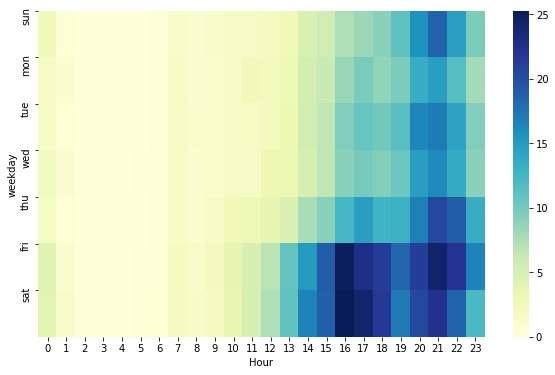

In [9]:
plt.figure(figsize=(10,6))
station_3 = train[train['STATION']==3]
group_weekday_hour = station_3.groupby(['weekday','hour'])['RENTCOUNT'].mean().reset_index()
weekday_hour = np.zeros([7, 24])
for i in range(7*24):
    weekday_hour[int(group_weekday_hour.iloc[i][0])][int(group_weekday_hour.iloc[i][1])]=group_weekday_hour.iloc[i][2]
ax = sns.heatmap(weekday_hour, cmap="YlGnBu")
ax.set(xlabel="Hour", ylabel="weekday")
weekday = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']
plt.yticks(np.arange(7), weekday)
plt.show()

In [10]:
import gmplot
import statistics

top = train.groupby(['STATION'], as_index=False)['RENTCOUNT'].sum()
top_10 = top.sort_values(by='RENTCOUNT', ascending=False).head(10)
top_10.head(10)

,STATION,RENTCOUNT
2,3,174558.0
55,56,91027.0
30,31,83488.0
16,17,82868.0
31,32,73573.0
32,33,71107.0
13,14,57448.0
20,21,56295.0
104,105,56242.0
54,55,55134.0


In [11]:
import pandas as pds
import gmplot
import statistics

station = pds.read_csv('./data/station.csv')

location = []
location_lat = []
location_lon = []
for i in range(10):
    for j in range(144):
        if top_10.iloc[i, 0] == station.iloc[j, 1]:
            location.append(station.iloc[j, 7].replace(" ","").split(","))
##            location_lon.append(float(station.iloc[j, 7].split(",").replace(" ", "")))

print(location)

for i in range(10):
    location_lat.append(float(location[i][0]))
    location_lon.append(float(location[i][1]))
    
print(location_lat)
print(location_lon)

gmapl = gmplot.GoogleMapPlotter(36.362216, 127.35613290000003, 14)
gmapl.scatter(location_lat, location_lon, '# FF0000', size=50, marker = False)
gmapl.plot(location_lat, location_lon, 'cornflowerblue', edge_width = 3.0) 
gmapl.draw("top10_homework.html")

[['36.369855', '127.388749'], ['36.361736', '127.344994'], ['36.361773', '127.357485'], ['36.35219', '127.378814'], ['36.359293', '127.354503'], ['36.358494', '127.361197'], ['36.355558', '127.379243'], ['36.373457', '127.359293'], ['36.364177', '127.358845'], ['36.362446', '127.344131']]
[36.369855, 36.361736, 36.361773, 36.35219, 36.359293, 36.358494, 36.355558, 36.373457, 36.364177, 36.362446]
[127.388749, 127.344994, 127.357485, 127.378814, 127.354503, 127.361197, 127.379243, 127.359293, 127.358845, 127.344131]


In [12]:
import pandas as pp

tashu = pp.read_csv('./data/tashu.csv')
tashu['count_map'] = 0
tashu_count = tashu.groupby(['RENT_STATION', 'RETURN_STATION'], as_index=False)['count_map'].count()

tashu_count = tashu_count[tashu_count['RENT_STATION'] < 145]
tashu_count = tashu_count[tashu_count['RETURN_STATION'] < 145]

tashu_count

,RENT_STATION,RETURN_STATION,count_map
0,1.0,1.0,14489
1,1.0,2.0,660
2,1.0,3.0,6135
3,1.0,4.0,851
4,1.0,5.0,802
5,1.0,6.0,289
6,1.0,7.0,666
7,1.0,8.0,549
8,1.0,9.0,281
9,1.0,10.0,681


In [13]:
tashu_map = tashu_count.sort_values(by='count_map', ascending=False)
tashu_map = tashu_map[tashu_map['RENT_STATION'] != tashu_map['RETURN_STATION']]

tashu_map = tashu_map.head(10)
tashu_map

,RENT_STATION,RETURN_STATION,count_map
3361,21.0,105.0,17220
15442,105.0,21.0,12154
8684,56.0,32.0,11868
5069,32.0,56.0,11118
15443,105.0,22.0,8074
15819,107.0,105.0,7912
3514,22.0,105.0,7463
3291,21.0,22.0,6556
2,1.0,3.0,6135
15520,105.0,107.0,6065


In [14]:
location_rent = []
location_return = []

for i in range(10):
    for j in range(144):
        if tashu_map.iloc[i, 0] == station.iloc[j, 1]:
            location_rent.append(station.iloc[j, 7].replace(" ", "").split(","))
            
    for k in range(144):
        if tashu_map.iloc[i, 1] == station.iloc[k, 1]:
            location_return.append(station.iloc[k, 7].replace(" ", "").split(","))
print(location_rent)
print(location_return)

location_lat = [[0]*2 for i in range(10)]
location_lon = [[0]*2 for i in range(10)]

for i in range(10):
    location_lat[i][0] = float(location_rent[i][0])
    location_lat[i][1] = float(location_return[i][0])
print(location_lat)

for j in range(10):
    location_lon[j][0] = float(location_rent[j][1])
    location_lon[j][1] = float(location_return[j][1])
print(location_lon)

[['36.373457', '127.359293'], ['36.364177', '127.358845'], ['36.361736', '127.344994'], ['36.359293', '127.354503'], ['36.364177', '127.358845'], ['36.370768', '127.366645'], ['36.370263', '127.362136'], ['36.373457', '127.359293'], ['36.374325', '127.387462'], ['36.364177', '127.358845']]
[['36.364177', '127.358845'], ['36.373457', '127.359293'], ['36.359293', '127.354503'], ['36.361736', '127.344994'], ['36.370263', '127.362136'], ['36.364177', '127.358845'], ['36.364177', '127.358845'], ['36.370263', '127.362136'], ['36.369855', '127.388749'], ['36.370768', '127.366645']]
[[36.373457, 36.364177], [36.364177, 36.373457], [36.361736, 36.359293], [36.359293, 36.361736], [36.364177, 36.370263], [36.370768, 36.364177], [36.370263, 36.364177], [36.373457, 36.370263], [36.374325, 36.369855], [36.364177, 36.370768]]
[[127.359293, 127.358845], [127.358845, 127.359293], [127.344994, 127.354503], [127.354503, 127.344994], [127.358845, 127.362136], [127.366645, 127.358845], [127.362136, 127.358

In [15]:
gmapl = gmplot.GoogleMapPlotter(36.362216, 127.35613290000003, 14)

for m in range(10):
    gmapl.scatter(location_lat[m], location_lon[m], '# FF0000', size=50, marker = False)
    gmapl.plot(location_lat[m], location_lon[m], 'cornflowerblue', edge_width = 3.0)
    
gmapl.draw("top10_homework_no_duplicate.html")